In [151]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
np.random.seed(1337)  # for reproducibility
import h5py
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import seaborn as sn
from sklearn.inspection import permutation_importance
from sklearn import metrics
from math import sqrt
from sklearn.feature_selection import SelectFromModel
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [152]:
data=pd.read_csv('./HIGGS.csv')
data.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [153]:
data_n= data.set_axis(['label', 'L_pT', 'L_eta', 'L_phi', 'E_T', 'E_phi', 'J1_pt', 'J1_eta', 'J1_phi', 'J1b-tag', 'J2_pt', 'J2_eta', 'J2_phi', 'J2b-tag', 'J3_pt', 'J3_eta', 'J3_phi', 'J3b-tag', 'J4_pt', 'J4_eta', 'J4_phi', 'J4b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1)
data_n.head()

,label,L_pT,L_eta,L_phi,E_T,E_phi,J1_pt,J1_eta,J1_phi,J1b-tag,...,J4_eta,J4_phi,J4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [154]:
sig = data_n[data_n['label']==1] 
bkg = data_n[data_n['label']==0] 
bkg.head()

,label,L_pT,L_eta,L_phi,E_T,E_phi,J1_pt,J1_eta,J1_phi,J1b-tag,...,J4_eta,J4_phi,J4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
10,0.0,0.739357,-0.178290,0.829934,0.504539,-0.130217,0.961051,-0.355518,-1.717399,2.173076,...,0.774065,0.398820,3.101961,0.944536,1.026261,0.982197,0.542115,1.250979,0.830045,0.761308
14,0.0,0.547014,-0.349709,-0.646657,2.040462,0.276457,0.544697,0.838699,1.728703,0.000000,...,-0.629242,1.570795,3.101961,0.689434,0.867230,1.082488,0.664142,0.354115,0.579945,0.817273
16,0.0,1.057976,-0.160759,-0.194997,2.705023,-0.751477,1.909919,-1.031845,0.864986,0.000000,...,-0.714190,1.505315,3.101961,0.954494,0.651039,1.124950,0.894001,0.672173,1.182358,1.316304


In [155]:
X=data_n.iloc[:100000,1:]#data.iloc[:,1:]
y=data_n.iloc[:100000,0]#data.iloc[:,0]

In [156]:
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

### XGBoost

In [157]:
# fit model no training data
model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

[0]	validation_0-logloss:0.64417	validation_1-logloss:0.64728
[1]	validation_0-logloss:0.61539	validation_1-logloss:0.62116
[2]	validation_0-logloss:0.59686	validation_1-logloss:0.60476
[3]	validation_0-logloss:0.58135	validation_1-logloss:0.59110
[4]	validation_0-logloss:0.57067	validation_1-logloss:0.58241
[5]	validation_0-logloss:0.56141	validation_1-logloss:0.57500
[6]	validation_0-logloss:0.55380	validation_1-logloss:0.56974
[7]	validation_0-logloss:0.54737	validation_1-logloss:0.56479
[8]	validation_0-logloss:0.54133	validation_1-logloss:0.56083
[9]	validation_0-logloss:0.53626	validation_1-logloss:0.55828
[10]	validation_0-logloss:0.53183	validation_1-logloss:0.55568
[11]	validation_0-logloss:0.52827	validation_1-logloss:0.55325
[12]	validation_0-logloss:0.52501	validation_1-logloss:0.55202
[13]	validation_0-logloss:0.52193	validation_1-logloss:0.55086
[14]	validation_0-logloss:0.52020	validation_1-logloss:0.54985
[15]	validation_0-logloss:0.51652	validation_1-logloss:0.54790
[1

resluts with no hyper-parameter tuning 

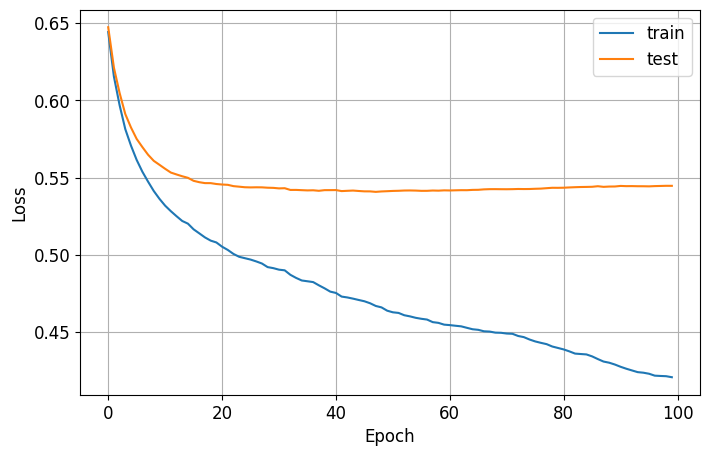

In [158]:
results = model.evals_result()
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(results['validation_0']['logloss'],label='train')
ax.plot(results['validation_1']['logloss'], label='test')

#ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid()
plt.legend()

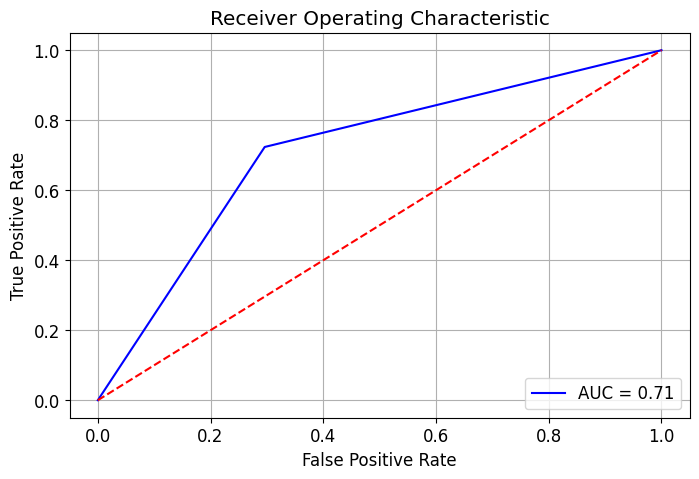

In [159]:
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(yhat, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()


Testing Confusion Matrix:



<Figure size 640x480 with 0 Axes>

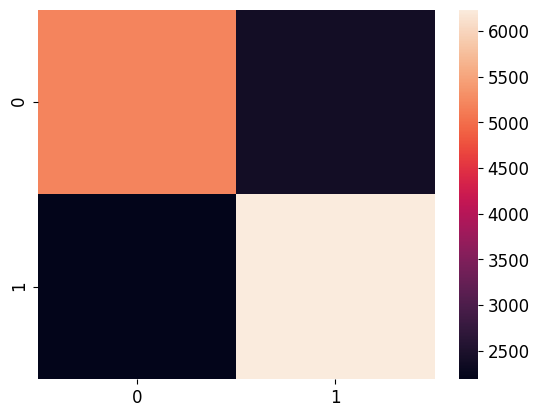

<Figure size 640x480 with 0 Axes>

In [160]:
confusion_matrix(y_test, yhat)
predictedY = model.predict(X_test)

print('\nTesting Confusion Matrix:\n')
sn.heatmap(confusion_matrix(y_test, yhat))
sn
plt.figure()

testing on the validation data

In [161]:
yhat_val = model.predict(X_val)
score = accuracy_score(y_val, yhat_val)
print('Accuracy: %.3f' % score)

Accuracy: 0.718


Adding Delta R between the jets

In [162]:
J1_eta = data_n['J1_eta'].to_numpy()
J2_eta = data_n['J2_eta'].to_numpy()
J3_eta = data_n['J3_eta'].to_numpy()
J4_eta = data_n['J4_eta'].to_numpy()
J1_phi = data_n['J1_phi'].to_numpy()
J2_phi = data_n['J2_phi'].to_numpy()
J3_phi = data_n['J3_phi'].to_numpy()
J4_phi = data_n['J4_phi'].to_numpy()

###################################################################
dR1 = np.ndarray((J1_eta.shape[0], ))
dR2 = np.ndarray((J1_eta.shape[0], ))
dR3 = np.ndarray((J1_eta.shape[0], ))
dR4 = np.ndarray((J1_eta.shape[0], ))
dR5 = np.ndarray((J1_eta.shape[0], ))
dR6 = np.ndarray((J1_eta.shape[0], ))
for event in range(J1_eta.shape[0]):
    dR1[event,] = sqrt(pow(J2_eta[event, ] - J1_eta[event,],2) + (pow(J2_phi[event,] - J1_phi[event,],2)))
    dR2[event,] = sqrt(pow(J2_eta[event, ] - J3_eta[event,],2) + (pow(J2_phi[event,] - J3_phi[event,],2)))
    dR3[event,] = sqrt(pow(J2_eta[event, ] - J4_eta[event,],2) + (pow(J2_phi[event,] - J4_phi[event,],2)))
    dR4[event,] = sqrt(pow(J1_eta[event, ] - J3_eta[event,],2) + (pow(J1_phi[event,] - J3_phi[event,],2)))
    dR5[event,] = sqrt(pow(J1_eta[event, ] - J4_eta[event,],2) + (pow(J1_phi[event,] - J4_phi[event,],2)))
    dR6[event,] = sqrt(pow(J3_eta[event, ] - J4_eta[event,],2) + (pow(J3_phi[event,] - J4_phi[event,],2)))

In [163]:
data_n['dR1'] = dR1.tolist()
data_n['dR2'] = dR2.tolist()
data_n['dR3'] = dR3.tolist()
data_n['dR4'] = dR4.tolist()
data_n['dR5'] = dR5.tolist()
data_n['dR6'] = dR6.tolist()
data_n.head()

,label,L_pT,L_eta,L_phi,E_T,E_phi,J1_pt,J1_eta,J1_phi,J1b-tag,...,m_jlv,m_bb,m_wbb,m_wwbb,dR1,dR2,dR3,dR4,dR5,dR6
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,0.978098,0.779732,0.992356,0.798343,2.879850,1.178233,1.572806,2.424804,1.690534,0.743142
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,0.951331,0.803252,0.865924,0.780118,2.216460,1.332832,1.768758,1.840497,0.505085,1.351880
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.728281,0.869200,1.026736,0.957904,1.939041,1.334692,2.096516,0.616797,1.054750,1.247982
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.838085,1.133295,0.872245,0.808487,2.821101,1.412821,1.637539,1.711925,1.247681,0.518677
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,0.789176,0.430553,0.961357,0.957818,1.219421,3.551812,2.996152,3.257159,2.856933,0.635582


does adding dR improve the results?

[0]	validation_0-logloss:0.57325	validation_1-logloss:0.64313
[1]	validation_0-logloss:0.48920	validation_1-logloss:0.61561
[2]	validation_0-logloss:0.42872	validation_1-logloss:0.58740
[3]	validation_0-logloss:0.37218	validation_1-logloss:0.56944
[4]	validation_0-logloss:0.33053	validation_1-logloss:0.55874
[5]	validation_0-logloss:0.28898	validation_1-logloss:0.56269
[6]	validation_0-logloss:0.27091	validation_1-logloss:0.56175
[7]	validation_0-logloss:0.23774	validation_1-logloss:0.57154
[8]	validation_0-logloss:0.21452	validation_1-logloss:0.56361
[9]	validation_0-logloss:0.19606	validation_1-logloss:0.56463
[10]	validation_0-logloss:0.18638	validation_1-logloss:0.56395
[11]	validation_0-logloss:0.16950	validation_1-logloss:0.56223
[12]	validation_0-logloss:0.15200	validation_1-logloss:0.56582
[13]	validation_0-logloss:0.13917	validation_1-logloss:0.57311
[14]	validation_0-logloss:0.13090	validation_1-logloss:0.57435
[15]	validation_0-logloss:0.11909	validation_1-logloss:0.57974
[1

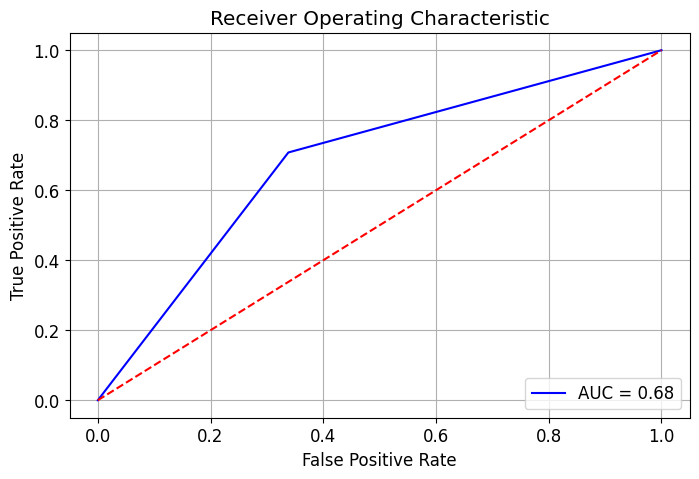

In [164]:
X=data_n.iloc[:100000,1:]#data.iloc[:,1:]
y=data_n.iloc[:100000,0]#data.iloc[:,0]
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)
# fit model no training data
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(yhat, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.grid()

In [165]:
yhat_val = model.predict(X_val)
score = accuracy_score(y_val, yhat_val)
print('Accuracy: %.3f' % score)

Accuracy: 0.705


Feature importance analysis:
Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function. The feature importances are then averaged across all of the the decision trees within the model.

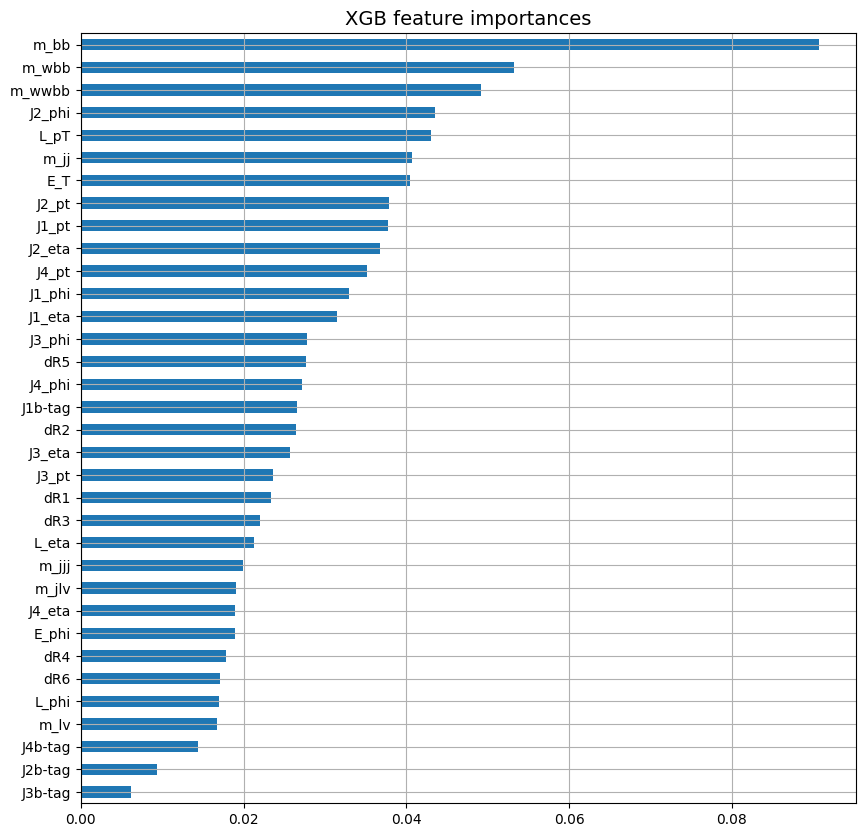

In [166]:
important = pd.Series(data=model.feature_importances_, index=X_train.columns).sort_values()

plt.style.use('default')

fig, ax = plt.subplots(figsize=(10,10))
_ = important.plot(kind='barh')

_ = plt.title('XGB feature importances', fontsize=14)
ax.grid()

Feature importance scores can be used for feature selection in scikit-learn.

This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features.

This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.


Using the feature importances calculated from the training dataset, we then wrap the model in a SelectFromModel instance. We use this to select features on the training dataset, train a model from the selected subset of features, then evaluate the model on the testset, subject to the same feature selection scheme.

In [167]:
from numpy import sort
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 67.88%
Thresh=0.000, n=34, Accuracy: 67.88%
Thresh=0.015, n=33, Accuracy: 68.18%
Thresh=0.015, n=32, Accuracy: 67.88%
Thresh=0.016, n=31, Accuracy: 68.18%
Thresh=0.018, n=30, Accuracy: 68.18%
Thresh=0.018, n=29, Accuracy: 70.00%
Thresh=0.019, n=28, Accuracy: 67.27%
Thresh=0.020, n=27, Accuracy: 69.39%
Thresh=0.021, n=26, Accuracy: 70.61%
Thresh=0.022, n=25, Accuracy: 70.91%
Thresh=0.022, n=24, Accuracy: 70.61%
Thresh=0.023, n=23, Accuracy: 65.76%
Thresh=0.025, n=22, Accuracy: 64.85%
Thresh=0.025, n=21, Accuracy: 67.58%
Thresh=0.026, n=20, Accuracy: 65.15%
Thresh=0.026, n=19, Accuracy: 67.88%
Thresh=0.026, n=18, Accuracy: 67.88%
Thresh=0.027, n=17, Accuracy: 68.79%
Thresh=0.027, n=16, Accuracy: 66.06%
Thresh=0.028, n=15, Accuracy: 67.88%
Thresh=0.029, n=14, Accuracy: 69.70%
Thresh=0.029, n=13, Accuracy: 67.88%
Thresh=0.029, n=12, Accuracy: 69.39%
Thresh=0.030, n=11, Accuracy: 66.06%
Thresh=0.033, n=10, Accuracy: 69.39%
Thresh=0.033, n=9, Accuracy: 69.39%
Thresh=0.034, n=8, Acc

n= 25 for number of features seems to return the best accuracy

In [168]:
data_f=data_n.drop(['J3b-tag', 'J2b-tag', 'J4b-tag', 'm_lv', 'L_phi', 'dR6', 'dR4', 'E_phi','J4_eta'], axis=1)
data_f.head()

,label,L_pT,L_eta,E_T,J1_pt,J1_eta,J1_phi,J1b-tag,J2_pt,J2_eta,...,m_jj,m_jjj,m_jlv,m_bb,m_wbb,m_wwbb,dR1,dR2,dR3,dR5
0,1.0,0.907542,0.329147,1.497970,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,...,0.302220,0.833048,0.978098,0.779732,0.992356,0.798343,2.879850,1.178233,1.572806,1.690534
1,1.0,0.798835,1.470639,0.453773,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,...,0.909753,1.108330,0.951331,0.803252,0.865924,0.780118,2.216460,1.332832,1.768758,0.505085
2,0.0,1.344385,-0.876626,1.992050,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,...,0.946652,1.028704,0.728281,0.869200,1.026736,0.957904,1.939041,1.334692,2.096516,1.054750
3,1.0,1.105009,0.321356,0.882808,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,...,0.755856,1.361057,0.838085,1.133295,0.872245,0.808487,2.821101,1.412821,1.637539,1.247681
4,0.0,1.595839,-0.607811,1.818450,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,...,0.823761,0.938191,0.789176,0.430553,0.961357,0.957818,1.219421,3.551812,2.996152,2.856933


[0]	validation_0-logloss:0.64414	validation_1-logloss:0.64735
[1]	validation_0-logloss:0.61518	validation_1-logloss:0.62122
[2]	validation_0-logloss:0.59650	validation_1-logloss:0.60489
[3]	validation_0-logloss:0.58065	validation_1-logloss:0.59127
[4]	validation_0-logloss:0.57007	validation_1-logloss:0.58291
[5]	validation_0-logloss:0.55974	validation_1-logloss:0.57443
[6]	validation_0-logloss:0.55159	validation_1-logloss:0.56816
[7]	validation_0-logloss:0.54607	validation_1-logloss:0.56447
[8]	validation_0-logloss:0.54000	validation_1-logloss:0.56054
[9]	validation_0-logloss:0.53541	validation_1-logloss:0.55780
[10]	validation_0-logloss:0.53109	validation_1-logloss:0.55642
[11]	validation_0-logloss:0.52719	validation_1-logloss:0.55446
[12]	validation_0-logloss:0.52472	validation_1-logloss:0.55351
[13]	validation_0-logloss:0.52171	validation_1-logloss:0.55242
[14]	validation_0-logloss:0.51779	validation_1-logloss:0.55078
[15]	validation_0-logloss:0.51439	validation_1-logloss:0.54948
[1

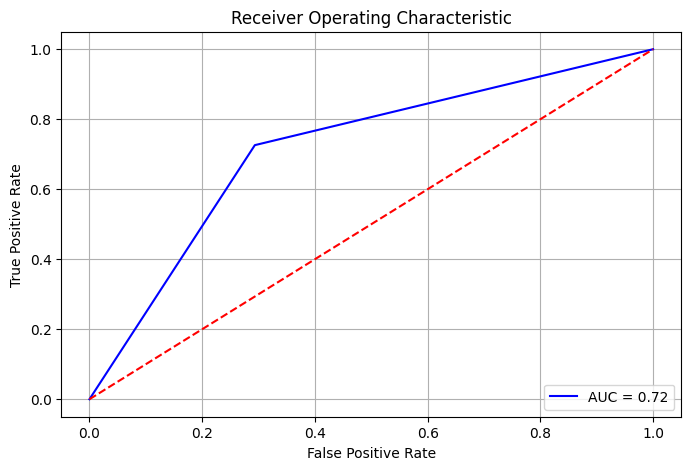

In [169]:
X=data_f.iloc[:100000,1:]#data.iloc[:,1:]
y=data_f.iloc[:100000,0]#data.iloc[:,0]
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)
# fit model no training data
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(yhat, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.grid()

In [170]:
yhat_val = model.predict(X_val)
score = accuracy_score(y_val, yhat_val)
print('Accuracy: %.3f' % score)

Accuracy: 0.717


### XGboost hyper parameter tuning 

Learning rate tuning

Best: -0.574690 using {'learning_rate': 0.01, 'n_estimators': 300}
-0.690749 (0.000535) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.688437 (0.001052) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.686225 (0.001543) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.684044 (0.002018) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.681905 (0.002476) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.671827 (0.004751) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
-0.654706 (0.008226) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
-0.671837 (0.004773) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.654723 (0.008264) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.641080 (0.011242) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.630332 (0.013967) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.621806 (0.016246) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.595178 (0.023997) with: {'learning_rate': 0.0

Text(0, 0.5, 'Log Loss')

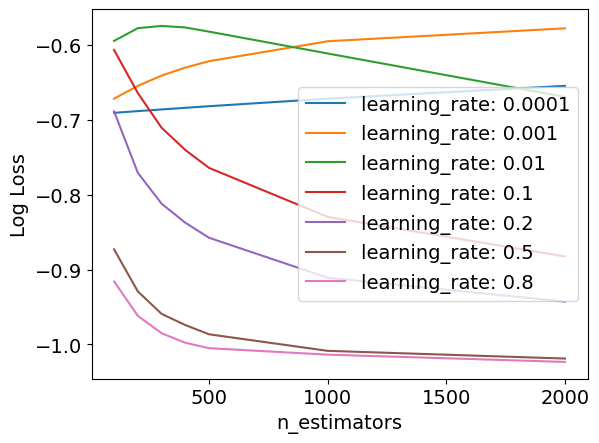

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# grid search
label_encoded_y = LabelEncoder().fit_transform(y)
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500, 1000, 2000]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.8]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
# pyplot.savefig('n_estimators_vs_learning_rate.png')

Best: -0.574991 using {'learning_rate': 0.0008, 'n_estimators': 5000}
-0.575543 (0.044006) with: {'learning_rate': 0.0005, 'n_estimators': 5000}
-0.575369 (0.054810) with: {'learning_rate': 0.0005, 'n_estimators': 7500}
-0.579842 (0.061178) with: {'learning_rate': 0.0005, 'n_estimators': 10000}
-0.574991 (0.056510) with: {'learning_rate': 0.0008, 'n_estimators': 5000}
-0.581518 (0.064799) with: {'learning_rate': 0.0008, 'n_estimators': 7500}
-0.592310 (0.069046) with: {'learning_rate': 0.0008, 'n_estimators': 10000}


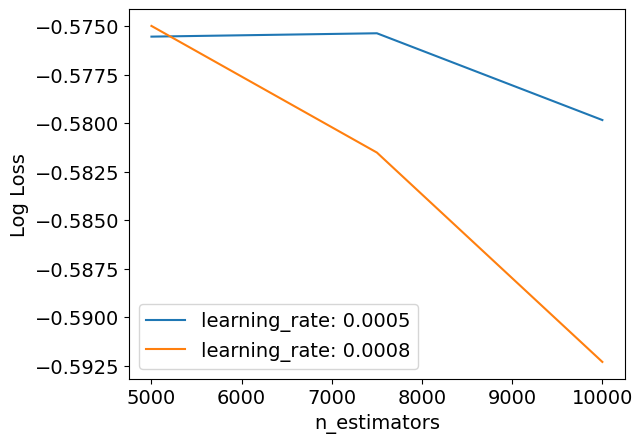

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# grid search
label_encoded_y = LabelEncoder().fit_transform(y)
model = XGBClassifier()
n_estimators = [5000, 7500, 10000]
learning_rate = [0.0005, 0.0008]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

#### xboost with tuned learning rate and n-estimators


In [197]:
# n_estimators=100, eta=0.05, subsample=0.1, colsample_bytree=0.8
model = XGBClassifier(n_estimators=7000, learning_rate=0.0008)
# define the datasets to evaluate each iteration
# evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(yhat, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.grid()

too expensive computationally !!

### basiyan hyper parameter tuning


- The method we will use here uses Gaussian processes to predict our loss function based on the hyperparameters.
- Initially, several hyperparameter sets are picked and the loss of the model is calculated. Based on those points the first Gaussian process model is trained.
- lib: called bayes_opt. To use the library you just need to implement one simple function, that takes your hyperparameter as a parameter and returns your desired loss function:

In [172]:
def hyperparam_loss(pbounds):
    
    # 1. Define machine learning model using param_x, param_y as hyper parameters
    # 2. Train the model
    # 3. Calculate loss on cross-validation set
    clf=xgb.XGBClassifier(
        learning_rate = pbounds['learning_rate'], n_estimators = pbounds['n_estimators'], max_depth = pbounds['max_depth'], 
        subsample = pbounds['subsample'], colsample = pbounds['colsample'], gamma = pbounds['gamma'], min_child_weight=space['min_child_weight'], use_label_encoder=False)
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']),use_label_encoder=False)
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy}
    
#     return lossX_train, X_test, y_train, y_test 

In [173]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (0.1, 1.0),  # Change for big datasets
    'colsample': (0.1, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))

In [174]:
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,)

In [175]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7792   |  0.4753   |  3.602    |  0.01011  |  5.116    |  232.1    |  0.1831   |
|  2        |  0.7713   |  0.2676   |  1.728    |  0.4028   |  6.772    |  477.3    |  0.7167   |
|  3        |  0.8002   |  0.4883   |  3.775    |  0.05888  |  6.228    |  231.9    |  0.8684   |
|  4        |  0.7552   |  0.6379   |  1.592    |  0.6664   |  6.139    |  255.0    |  0.3726   |
|  5        |  0.7691   |  0.7118   |  3.269    |  0.5103   |  6.072    |  231.3    |  0.7164   |


80% cross val score with baysian hyper parameter tuning

In [176]:
print(optimizer.max)

{'target': 0.8002353650303687, 'params': {'colsample': 0.4883257393131577, 'gamma': 3.7749325506708455, 'learning_rate': 0.058875870826200785, 'max_depth': 6.227565560778299, 'n_estimators': 231.94313602635697, 'subsample': 0.8683856244363712}}


In [179]:
# fit model no training data
model = XGBClassifier(colsample=0.4883, gamma=3.775, learning_rate=0.0588, max_depth=6, n_estimators=232, subsample=0.8684)

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

[10:26:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.68224	validation_1-logloss:0.68294
[1]	validation_0-logloss:0.67251	validation_1-logloss:0.67379
[2]	validation_0-logloss:0.66353	validation_1-logloss:0.66529
[3]	validation_0-logloss:0.65560	validation_1-logloss:0.65793
[4]	validation_0-logloss:0.64845	validation_1-logloss:0.65141
[5]	validation_0-logloss:0.64182	validation_1-logloss:0.64528
[6]	validation_0-logloss:0.63562	validation_1-logloss:0.63958
[7]	validation_0-logloss:0.63001	validation_1-logloss:0.63456
[8]	validation_0-logloss:0.62456	validation_1-logloss:0.62960
[9]	validation_0-logloss:0.61944	validation_1-logloss:0.62486
[10]	validation_0-log

[125]	validation_0-logloss:0.49579	validation_1-logloss:0.53916
[126]	validation_0-logloss:0.49530	validation_1-logloss:0.53900
[127]	validation_0-logloss:0.49473	validation_1-logloss:0.53872
[128]	validation_0-logloss:0.49453	validation_1-logloss:0.53867
[129]	validation_0-logloss:0.49423	validation_1-logloss:0.53855
[130]	validation_0-logloss:0.49391	validation_1-logloss:0.53848
[131]	validation_0-logloss:0.49352	validation_1-logloss:0.53841
[132]	validation_0-logloss:0.49328	validation_1-logloss:0.53839
[133]	validation_0-logloss:0.49310	validation_1-logloss:0.53834
[134]	validation_0-logloss:0.49290	validation_1-logloss:0.53824
[135]	validation_0-logloss:0.49234	validation_1-logloss:0.53798
[136]	validation_0-logloss:0.49205	validation_1-logloss:0.53799
[137]	validation_0-logloss:0.49181	validation_1-logloss:0.53795
[138]	validation_0-logloss:0.49139	validation_1-logloss:0.53799
[139]	validation_0-logloss:0.49119	validation_1-logloss:0.53797
[140]	validation_0-logloss:0.49112	valid

In [180]:
yhat_val = model.predict(X_val)
score = accuracy_score(y_val, yhat_val)
print('Accuracy: %.3f' % score)

Accuracy: 0.726


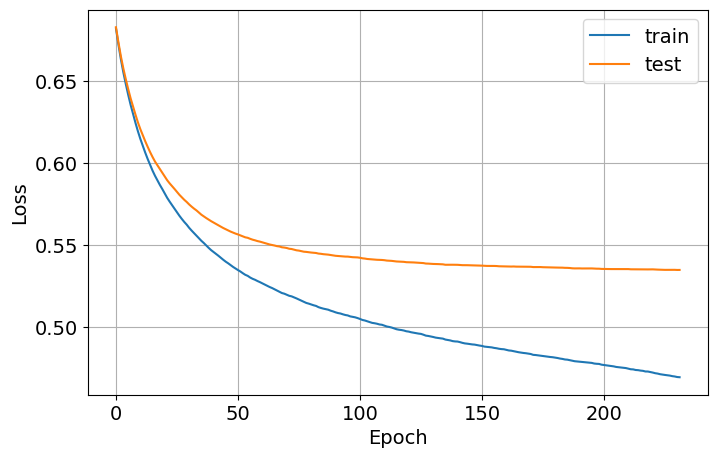

In [181]:
results = model.evals_result()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(results['validation_0']['logloss'],label='train')
ax.plot(results['validation_1']['logloss'], label='test')

#ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid()
plt.legend()

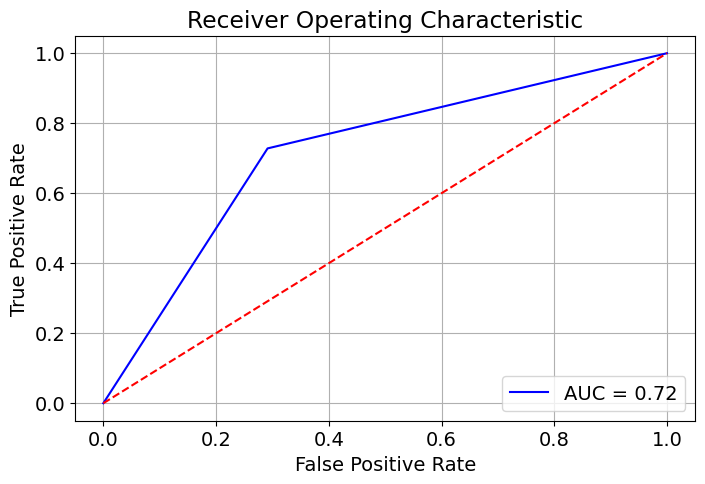

In [182]:
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(yhat, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.grid()

#### 72% accuracy with baysian hyper-parameter tuning 

## Random Forest

In [183]:
from xgboost import XGBRFClassifier
model = XGBRFClassifier()
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.691 (0.004)


69% (nice) accuracy with random forest & no tuning 

tuning of random forest

>10 0.687 (0.004)
>50 0.688 (0.004)
>100 0.689 (0.004)
>500 0.689 (0.004)


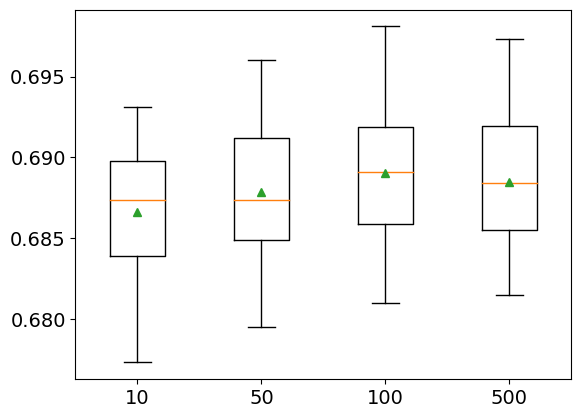

In [185]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define the number of trees to consider
	n_trees = [10, 50, 100, 500]
	for v in n_trees:
		models[str(v)] = XGBRFClassifier(n_estimators=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.660 (0.004)
>0.30000000000000004 0.691 (0.004)
>0.5000000000000001 0.692 (0.005)
>0.7000000000000001 0.692 (0.004)
>0.9000000000000001 0.689 (0.004)


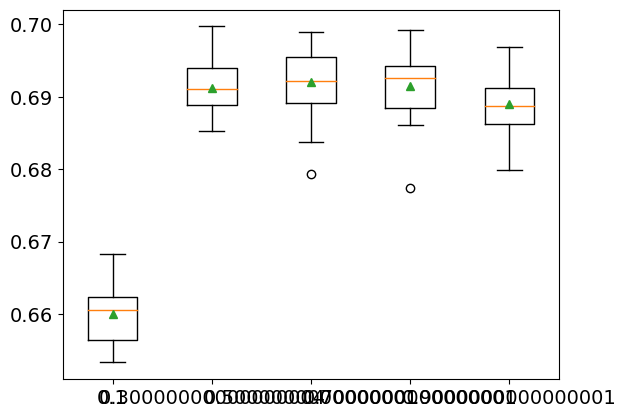

In [187]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for v in arange(0.1, 1.1, 0.2):
		models[str(v)] = XGBRFClassifier(colsample_bynode=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.691 (0.004)
>0.30000000000000004 0.691 (0.004)
>0.5000000000000001 0.691 (0.004)
>0.7000000000000001 0.691 (0.004)
>0.9000000000000001 0.691 (0.004)


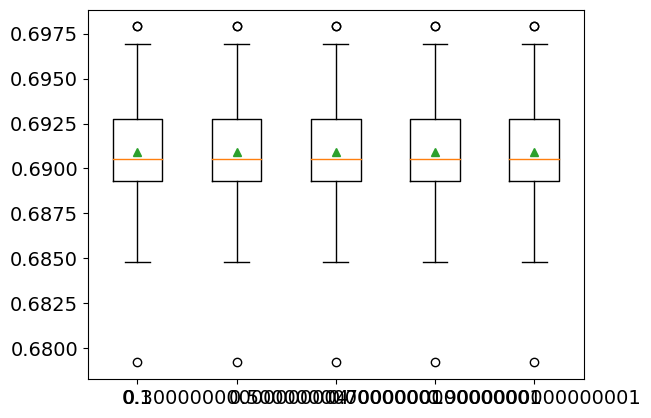

In [188]:

def get_models():
	models = dict()
	# define the number of trees to consider
# 	n_trees = [800, 900, 1000, 1100, 2000, 2500, 3000, 4000, 5000]
	for v in arange(0.1, 1.1, 0.2):
		models[str(v)] = XGBRFClassifier(learning_rate=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:

def get_models():
	models = dict()
	# define the number of trees to consider
# 	n_trees = [800, 900, 1000, 1100, 2000, 2500, 3000, 4000, 5000]
	for v in arange(1, 11, 1):
		models[str(v)] = XGBRFClassifier(max_depth=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# X=data_f.iloc[:1000,1:]#data.iloc[:,1:]
# y=data_f.iloc[:1000,0]#data.iloc[:,0]
def get_models():
	models = dict()
	# define the number of trees to consider
# 	n_trees = [800, 900, 1000, 1100, 2000, 2500, 3000, 4000, 5000]
	for v in arange(1, 5, 1):
		models[str(v)] = XGBRFClassifier(num_parallel_tree=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for v in arange(0.1, 1.1, 0.2):
		models[str(v)] = XGBRFClassifier(subsample=v)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

using the results of grid seach for the random forest 

In [191]:
model = XGBRFClassifier(n_estimators=100, colsample_bynode=0.7, max_depth=8,  subsample=0.5)

In [198]:
X=data_f.iloc[:1000,1:]#data.iloc[:,1:]
y=data_f.iloc[:1000,0]#data.iloc[:,0]
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
scores = evaluate_model(model, X, y)
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.713 (0.045)


71% accuracy for random forest 

## Best approach:
#### Baysian hyper parameter tuning 
training on the full data & the final score

In [207]:
X=data_f.iloc[:,1:]#data.iloc[:,1:]
y=data_f.iloc[:,0]#data.iloc[:,0]
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [208]:
clf=xgb.XGBClassifier(gamma=3.775, learning_rate=0.0588, max_depth=6, n_estimators=232, subsample=0.8684)
evaluation = [( X_train, y_train), ( X_test, y_test)]

clf.fit(X_train, y_train,
eval_set=evaluation, eval_metric="auc",
early_stopping_rounds=10,verbose=False)


pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("SCORE:", accuracy)

[12:08:35] WARNING: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
SCORE: 0.7347761363636364


In [209]:
import joblib
filename = 'higgs_classification.sav'
joblib.dump(model, filename)

['higgs_classification.sav']

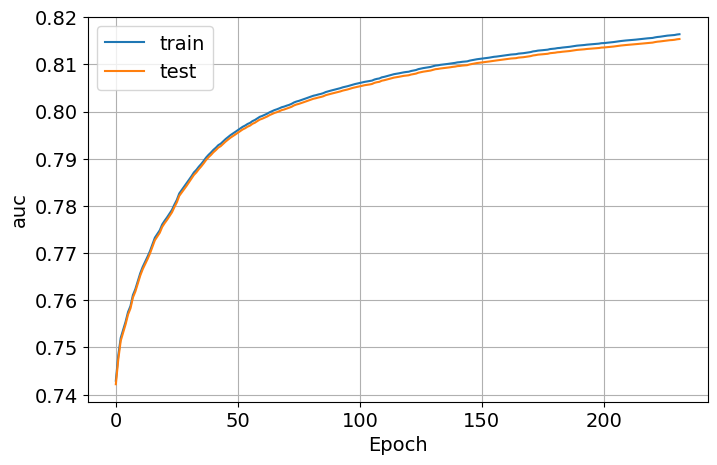

In [215]:
results = clf.evals_result()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(results['validation_0']['auc'],label='train')
ax.plot(results['validation_1']['auc'], label='test')
# ax.set_ylim(0.5,1)
#ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("auc")
ax.grid()
plt.legend()

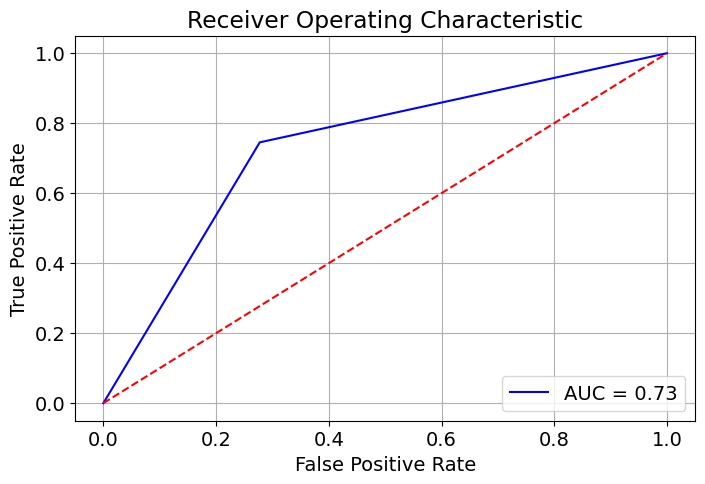

In [211]:
fig, ax = plt.subplots(figsize=(8,5))
fpr, tpr, threshold = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.grid()

In [217]:
yhat_val = clf.predict(X_val)
score = accuracy_score(y_val, yhat_val)
print('Accuracy: %.3f' % score)

Accuracy: 0.735
